# Guruprasad Velikadu Krishnamoorthy

## Week 3 Assignment

## Initial setup:
#### This section contains the initial download of the files and Python files that will be references in this assignment. 

In [1]:
# Download basename and exists from OS module which will be used in the download function
from os.path import basename, exists

# Create a function named download_file, to dounload the scripts and files from Github to local path
def download_file(url):
    """
    Downloads the scripts/ files from Github to local directory
    takes url as input.
    """
    filename = basename(url)
    # Checking if the file exists in the local directory and it downloads the file if it doesn't exist already.
    if not exists(filename):
        from urllib.request import urlretrieve
        # Downloading the files to the local path
        local, _ = urlretrieve(url, filename)
        # Printing confirmation message
        print("Downloaded " + local)

#  Calling download functions to download thinkstats2.py and thinkplot.py used throughtout this assignment
download_file("https://github.com/AllenDowney/ThinkStats2/raw/master/code/thinkstats2.py")
download_file("https://github.com/AllenDowney/ThinkStats2/raw/master/code/thinkplot.py")

In [2]:
# Calling download_file function to download source files and nsfg.py
download_file("https://github.com/AllenDowney/ThinkStats2/raw/master/code/nsfg.py")

download_file("https://github.com/AllenDowney/ThinkStats2/raw/master/code/2002FemPreg.dct")
download_file(
    "https://github.com/AllenDowney/ThinkStats2/raw/master/code/2002FemPreg.dat.gz"
)

In [3]:
# Importing the nsfg and other modules module from the author's code
import nsfg
import thinkstats2
import thinkplot

# importing the required libraries
import numpy as np
import sys
from collections import defaultdict
import math
import itertools
import pandas as pd


In [4]:
# Setting the maximum number of rows and columns to display
pd.options.display.max_rows=20
pd.options.display.max_columns=20
pd.options.display.precision =3

In [5]:
# Creating a Pandas dataframe named pregnancy_df by reading the file 2002FemPreg.dat.gz 
# and definition file 2002FemPreg.dct

dct_file='2002FemPreg.dct'
dat_file='2002FemPreg.dat.gz'

# reading the contents of dictionary file
dictionary_file = thinkstats2.ReadStataDct(dct_file)
# creating a dataframe pregnancy_df by reading contents of source file
pregnancy_df = dictionary_file.ReadFixedWidth(dat_file, compression='gzip')
# Calling the CleanFemPreg to cleanse the dataframe
nsfg.CleanFemPreg(pregnancy_df)
# Printing the top 5 lines of dataframe
pregnancy_df.head()

,caseid,pregordr,howpreg_n,howpreg_p,moscurrp,nowprgdk,pregend1,pregend2,nbrnaliv,multbrth,...,laborfor_i,religion_i,metro_i,basewgt,adj_mod_basewgt,finalwgt,secu_p,sest,cmintvw,totalwgt_lb
0,1,1,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,3410.389,3869.350,6448.271,2,9,NaN,8.812
1,1,2,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,3410.389,3869.350,6448.271,2,9,NaN,7.875
2,2,1,NaN,NaN,NaN,NaN,5.0,NaN,3.0,5.0,...,0,0,0,7226.302,8567.549,12999.542,2,12,NaN,9.125
3,2,2,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,7226.302,8567.549,12999.542,2,12,NaN,7.000
4,2,3,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,7226.302,8567.549,12999.542,2,12,NaN,6.188


In [6]:
# Printing the row and column size of the Pregnancy dataframe
print(pregnancy_df.shape)

# Validating the contents of Dataframe. If all tests are a pass, no results will be returned, else assertion error will be raised.
assert len(pregnancy_df) == 13593
assert pregnancy_df.caseid[13592] == 12571
assert pregnancy_df.pregordr.value_counts()[1] == 5033
assert pregnancy_df.nbrnaliv.value_counts()[1] == 8981
assert pregnancy_df.babysex.value_counts()[1] == 4641
assert pregnancy_df.birthwgt_lb.value_counts()[7] == 3049
assert pregnancy_df.birthwgt_oz.value_counts()[0] == 1037
assert pregnancy_df.prglngth.value_counts()[39] == 4744
assert pregnancy_df.outcome.value_counts()[1] == 9148
assert pregnancy_df.birthord.value_counts()[1] == 4413
assert pregnancy_df.agepreg.value_counts()[22.75] == 100
assert pregnancy_df.totalwgt_lb.value_counts()[7.5] == 302

weights = pregnancy_df.finalwgt.value_counts()
key = max(weights.keys())
assert pregnancy_df.finalwgt.value_counts()[key] == 6

(13593, 244)


# Exercise 1.1

#### Select the birthord column, print the value counts, and compare to results published in the codebook

In [7]:
# Validating the output with NFSG Codebook located at : https://ftp.cdc.gov/pub/Health_Statistics/NCHS/Dataset_Documentation/NSFG/Cycle6Codebook-Pregnancy.pdf
pregnancy_df.birthord.value_counts().sort_index()

1.0     4413
2.0     2874
3.0     1234
4.0      421
5.0      126
6.0       50
7.0       20
8.0        7
9.0        2
10.0       1
Name: birthord, dtype: int64

#### We can also use isnull to count the number of nans.

In [8]:
# Using isnull function to calculate the total number of nulls
pregnancy_df.birthord.isnull().sum()

4445

#### Select the `prglngth` column, print the value counts, and compare to results published in the [codebook]

In [9]:
# Validating the output with NFSG Codebook located at : https://ftp.cdc.gov/pub/Health_Statistics/NCHS/Dataset_Documentation/NSFG/Cycle6Codebook-Pregnancy.pdf
pregnancy_df.prglngth.value_counts().sort_index()

0      15
1       9
2      78
3     151
4     412
     ... 
45     10
46      1
47      1
48      7
50      2
Name: prglngth, Length: 50, dtype: int64

####  To compute the mean of a column, you can invoke the mean method on a Series. For example, here is the mean birthweight in pounds:

In [10]:
# Calculating mean of totalwgt_lb column 
pregnancy_df.totalwgt_lb.mean()

7.265628457623368

#### Create a new column named totalwgt_kg that contains birth weight in kilograms. Compute its mean. Remember that when you create a new column, you have to use dictionary syntax, not dot notation.

In [11]:
# Converting the Total weight in pounds to Kilogram by dividing by 2.2
pregnancy_df["totalwgt_kg"]=pregnancy_df["totalwgt_lb"]/2.20
# calculating mean of Kilogram using mean method
totalwgt_kg_mean=pregnancy_df.totalwgt_kg.mean()
print(f"The Mean weight in Kilogram is {totalwgt_kg_mean}")


The Mean weight in Kilogram is 3.302558389828807


#### nsfg.py also provides ReadFemResp, which reads the female respondents file and returns a DataFrame:

In [12]:
# Downloading the file 2002FemResp.dat.gz and its structure from Github
# using download_file function
download_file("https://github.com/AllenDowney/ThinkStats2/raw/master/code/2002FemResp.dct")
download_file("https://github.com/AllenDowney/ThinkStats2/raw/master/code/2002FemResp.dat.gz")

In [13]:
# Creating a new dataframe to store the Female Respondents file
dct_file_resp='2002FemResp.dct'
dat_file_resp='2002FemResp.dat.gz'

# creating a dictioary to read the contents and creating the dataframe from its definition.
dictionary_resp = thinkstats2.ReadStataDct(dct_file_resp)
respondents_df = dictionary_resp.ReadFixedWidth(dat_file_resp, compression='gzip')
# Validating the dataframe results
assert(len(respondents_df) == 7643)
assert(respondents_df.pregnum.value_counts()[1] == 1267)

#### DataFrame provides a method head that displays the first five rows:

In [14]:
respondents_df.head()

,caseid,rscrinf,rdormres,rostscrn,rscreenhisp,rscreenrace,age_a,age_r,cmbirth,agescrn,...,pubassis_i,basewgt,adj_mod_basewgt,finalwgt,secu_r,sest,cmintvw,cmlstyr,screentime,intvlngth
0,2298,1,5,5,1,5.0,27,27,902,27,...,0,3247.917,5123.760,5556.717,2,18,1234,1222,18:26:36,110.493
1,5012,1,5,1,5,5.0,42,42,718,42,...,0,2335.279,2846.799,4744.191,2,18,1233,1221,16:30:59,64.294
2,11586,1,5,1,5,5.0,43,43,708,43,...,0,2335.279,2846.799,4744.191,2,18,1234,1222,18:19:09,75.149
3,6794,5,5,4,1,5.0,15,15,1042,15,...,0,3783.152,5071.464,5923.977,2,18,1234,1222,15:54:43,28.643
4,616,1,5,4,1,5.0,20,20,991,20,...,0,5341.330,6437.336,7229.128,2,18,1233,1221,14:19:44,69.503


#### Select the age_r column from resp and print the value counts. How old are the youngest and oldest respondents?

In [15]:
# Printing the count of different ages in respondents_df
respondents_df.age_r.value_counts().sort_index()


15    217
16    223
17    234
18    235
19    241
     ... 
40    256
41    250
42    215
43    253
44    235
Name: age_r, Length: 30, dtype: int64

In [16]:
# Printing youngest and oldest respondent's age
print(f"The Youngest respondents are of age {respondents_df.age_r.min()} and oldest are of {respondents_df.age_r.max()} years old.")

The Youngest respondents are of age 15 and oldest are of 44 years old.


#### We can use the caseid to match up rows from resp and preg. For example, we can select the row from resp for caseid 2298 like this:

In [17]:
respondents_df[respondents_df.caseid==2298]

,caseid,rscrinf,rdormres,rostscrn,rscreenhisp,rscreenrace,age_a,age_r,cmbirth,agescrn,...,pubassis_i,basewgt,adj_mod_basewgt,finalwgt,secu_r,sest,cmintvw,cmlstyr,screentime,intvlngth
0,2298,1,5,5,1,5.0,27,27,902,27,...,0,3247.917,5123.76,5556.717,2,18,1234,1222,18:26:36,110.493


#### And we can get the corresponding rows from preg like this:

In [18]:
pregnancy_df[pregnancy_df.caseid==2298]

,caseid,pregordr,howpreg_n,howpreg_p,moscurrp,nowprgdk,pregend1,pregend2,nbrnaliv,multbrth,...,religion_i,metro_i,basewgt,adj_mod_basewgt,finalwgt,secu_p,sest,cmintvw,totalwgt_lb,totalwgt_kg
2610,2298,1,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,3247.917,5123.76,5556.717,2,18,NaN,6.875,3.125
2611,2298,2,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,3247.917,5123.76,5556.717,2,18,NaN,5.500,2.500
2612,2298,3,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,3247.917,5123.76,5556.717,2,18,NaN,4.188,1.903
2613,2298,4,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,3247.917,5123.76,5556.717,2,18,NaN,6.875,3.125


#### How old is the respondent with caseid 1?

In [19]:
respondents_df[respondents_df.caseid==1].age_r

1069    44
Name: age_r, dtype: int64

#### What are the pregnancy lengths for the respondent with caseid 2298?

In [20]:
pregnancy_df[pregnancy_df.caseid==2298].prglngth

2610    40
2611    36
2612    30
2613    40
Name: prglngth, dtype: int64

#### What was the birthweight of the first baby born to the respondent with caseid 5012?

In [21]:
pregnancy_df[pregnancy_df.caseid==5012].birthwgt_lb

5515    6.0
Name: birthwgt_lb, dtype: float64

# Exercise 1-2

In [22]:
# Using the 2002FemResp.data.gz that was used as part of exercise 1.1.
respondents_df.head()

,caseid,rscrinf,rdormres,rostscrn,rscreenhisp,rscreenrace,age_a,age_r,cmbirth,agescrn,...,pubassis_i,basewgt,adj_mod_basewgt,finalwgt,secu_r,sest,cmintvw,cmlstyr,screentime,intvlngth
0,2298,1,5,5,1,5.0,27,27,902,27,...,0,3247.917,5123.760,5556.717,2,18,1234,1222,18:26:36,110.493
1,5012,1,5,1,5,5.0,42,42,718,42,...,0,2335.279,2846.799,4744.191,2,18,1233,1221,16:30:59,64.294
2,11586,1,5,1,5,5.0,43,43,708,43,...,0,2335.279,2846.799,4744.191,2,18,1234,1222,18:19:09,75.149
3,6794,5,5,4,1,5.0,15,15,1042,15,...,0,3783.152,5071.464,5923.977,2,18,1234,1222,15:54:43,28.643
4,616,1,5,4,1,5.0,20,20,991,20,...,0,5341.330,6437.336,7229.128,2,18,1233,1221,14:19:44,69.503


#### The variable pregnum is a recode that represents how many times each respondent has been pregnant. Print the value counts for this variable and compare them to the published results in NFSG codebook.

In [23]:
# Validating the results in https://ftp.cdc.gov/pub/Health_Statistics/NCHS/Dataset_Documentation/NSFG/Cycle6Codebook-Female.pdf
respondents_df.pregnum.value_counts().sort_index()

0     2610
1     1267
2     1432
3     1110
4      611
5      305
6      150
7       80
8       40
9       21
10       9
11       3
12       2
14       2
19       1
Name: pregnum, dtype: int64

#### You can also cross validate the respondent and pregnancy files by comparing the pregnum for each respondent with the number of records in pregnancy file.


In [24]:
# creating a pregnancy Map for Pregnancy Dataframe using defaultdict function with list argument from collections module
pregnancy_dict = defaultdict(list)

# Iterating through each item in caseid and appending to dictionary map 
for preg_rowNum, preg_caseid in pregnancy_df.caseid.items():
    pregnancy_dict[preg_caseid].append(preg_rowNum)

    # Using itertools to print sample output from pregnancy_dict
pregnancy_dict_sample = dict(itertools.islice(pregnancy_dict.items(), 10))
print(pregnancy_dict_sample)
    

{1: [0, 1], 2: [2, 3, 4], 6: [5, 6, 7], 7: [8, 9], 12: [10], 14: [11, 12, 13], 15: [14, 15, 16], 18: [17, 18], 21: [19, 20], 23: [21, 22]}


#### creating a Map for Female Respondents and validating the number of pregnancies (pregnum) for each respondent with number of records in pregnancy files


In [25]:
# creating a variable pregum_Valid_Ind to calculate the number of valid records
pregum_Valid_Ind=0
# Iterating through each value in respondents_df.pregnum and extracting index and values
for resp_rowNum, pregnum in respondents_df.pregnum.items():
        # for each index, extract the respective caseid from respondent dataframe
        resp_caseid = respondents_df.caseid[resp_rowNum]
        # for the caseid from respondents df, get all indexes that was calculated in pregnancy dictionary map
        resp_caseid_indices = pregnancy_dict[resp_caseid]
        
        # If the number of pregnancies for a given caseid in 
        # Pregnancy map does not match with the number of pregnancy in respondents df, print the mistmatched results
        if len(resp_caseid_indices) != pregnum:
            print(resp_caseid, len(resp_caseid_indices), pregnum)
        
        # Using indicator to extract all valid values and increment by 1 to keep track of the count
        else:
            pregum_Valid_Ind+=1

In [26]:
print(f" The number of valid values are {pregum_Valid_Ind} ")
# Validating the count of valid values with number of rows in dataframe 
# to make sure all the values are valid.
assert pregum_Valid_Ind == len(respondents_df)

 The number of valid values are 7643 


# Exercise 2.1

#### Summarize what you have learned about whether first babies arrive late?

In [27]:
# Creating dataframes for Alive births based on condition that outcome of Pregnancy df equals 1
live_births = pregnancy_df[pregnancy_df.outcome == 1]
# Creating Dataframes for First babies and other babies based on the BirthOrder
first_babies = live_births[live_births.birthord == 1]
other_babies = live_births[live_births.birthord != 1]

In [28]:
# Calculating the Mean, Variance and Standard deviation of Live, first and other births

# Summary statistics of Live births
mean_live = live_births.prglngth.mean()
var_live = live_births.prglngth.var()
std_live = live_births.prglngth.std()

# Summary statistics of  First babies
mean_first = first_babies.prglngth.mean()
var_first = first_babies.prglngth.var()
std_first = first_babies.prglngth.std()

# Summary statistics of  Other babies
mean_others = other_babies.prglngth.mean()
var_others = other_babies.prglngth.var()
std_others = other_babies.prglngth.std()

# Printing results of  Summary statistics
print(f'Mean of Live child births is {mean_live}')
print(f'Mean of First Child births is {mean_first}')
print(f'Mean of Other Child births is {mean_others}')

print("#############################################")

print(f'Variance of Live child births is {var_live}')
print(f'Variance of First Child births is {var_first}')
print(f'Variance of Other Child births is {var_others}')

print("#############################################")

print(f'Standard Deviation of Live child births is {std_live}')
print(f'Standard Deviation of First Child births is {std_first}')
print(f'Standard Deviation of Other Child births is {std_others}')

# Calculating Cohen's d between the groups First babies and Other Babies
mean_difference = mean_first-mean_others
# Calculating the number of items in the Dataframes of First Babies and Other babies
len_first, len_others= len(first_babies) , len(other_babies)
# Calculating Pooled Vriance
pooled_var=((len_first * var_first) + (len_others * var_others))/ (len_first + len_others)
# Calculating the Cohen's d from the variables defined above
cohens_d=mean_difference /math.sqrt(pooled_var)
print(f"Cohen's d Measure of First birth and Other child birth  Pregnancy length is {cohens_d}")


Mean of Live child births is 38.56055968517709
Mean of First Child births is 38.60095173351461
Mean of Other Child births is 38.52291446673706
#############################################
Variance of Live child births is 7.302662067826851
Variance of First Child births is 7.794713509229059
Variance of Other Child births is 6.842683519298573
#############################################
Standard Deviation of Live child births is 2.702343810070593
Standard Deviation of First Child births is 2.7919014146686947
Standard Deviation of Other Child births is 2.615852350439255
Cohen's d Measure of First birth and Other child birth  Pregnancy length is 0.028879044654449883


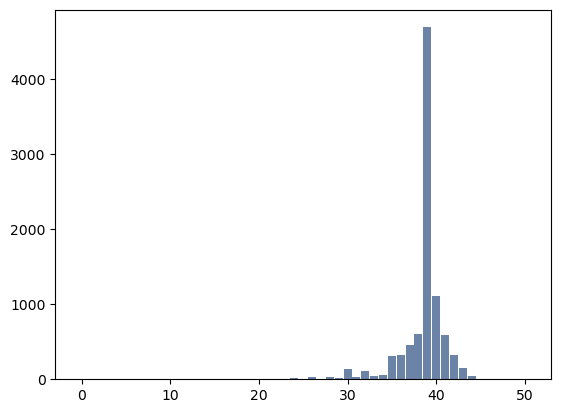

In [29]:
# Creating Histograms of the Live birth Babies
hist_live = thinkstats2.Hist(np.floor(live_births.prglngth), label='prglngth')
thinkplot.Hist(hist_live)

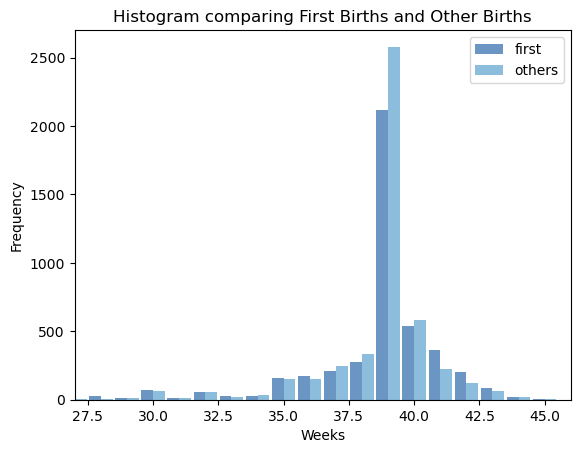

<Figure size 800x600 with 0 Axes>

In [30]:
# Creating Histogram of First babies and the other Babies
first_babies_hist=thinkstats2.Hist(first_babies.prglngth, label='first')
other_babies_hist=thinkstats2.Hist(other_babies.prglngth,  label='others')
thinkplot.PrePlot(2)
# Plotting the histogram by setting the alignment and the width
thinkplot.Hist(first_babies_hist,align='right',width=0.45)
thinkplot.Hist(other_babies_hist,align='left',width=0.45)
thinkplot.Show(xlabel='Weeks',ylabel='Frequency',axis=[27, 46, 0, 2700],
               title='Histogram comparing First Births and Other Births')

#### ***Question:*** Based on the results in the chapter, suppose you were asked to summarize what you learned about whether first babies arrive late



#### ***Solution***: The Results of the Histogram indiate that most of the First babies and Other babies arrive around 38-39 weeks of Pregnancy. There is not much difference looking at the results of the Histogram in terms of Pregnancy length. The mean and standard deviations of these two groups can be used to compare the results which are almost same. The Mean pregnancy length of first babies is 38.6 weeks while the mean for Other babies is 38.523 weeks and the difference is almost not noticeable. So the answer to the question is Yes, the First babies arrive later than the other babies, but the difference is almost so marginally small, it is not noticeable. 

####  ***Question:*** Which summary statistics would you use if you wanted to get a story on evening news?

#### ***Solution:***  To get a story in the evening news, people don't like to hear the obvious facts and the topic should be either negative or something out of ordinary which mayeasily earn me a easy spot on the evening news(Pardon my opinion about the media). Hence I would pick the Outliers as the Summary Statistics to get the spot on Evening news and this will be my title:

##  BREAKING NEWS : 50 Weeks of Pregnancy! Is that medically possible?

#### In the details of the news, I will mention that the 50 weeks pregnancy is medically unlikely and may be an outlier and talk about the mean and other summary statistics.

#### ***Question:*** Which ones would you use if you wanted to reassure an anxious patient
#### ***Solution:*** Assuming the patient is not a statistics expert, I would pick the simple statistics measure that a regular person can understand. So I will go with mean Pregnancy length of First born and Other babies and explain the anxious patient how similar they are and there is not much to worry ! The difference between in the mean of the 2 groups is about 13 hours which is almoct not noticeable.

#### ***Question:*** "Do First Babies arrive late"? Write a paragraph that uses the results in the chapter to answer the question clearly, precisely and honestly

#### ***Solution:*** Based on the results in the Histogram of the Pregnancy lengths of the First babies and the other babies, we can see that the babies are born around 38-39 weeks for most of the women. Also based on the results of the mean between the groups, the difference in numbers is almost marginal that it is hardly even noticeable. The Standard Deviation between the groups also indicate that the numbers are almost similar which means we can expect about 2-3 weeks of deviation for both first babies and other babies. The Cohen's d measure confirm this observation that the measure 0.029 is almost not noticeable. 

#### So the short answer to the question is, YES THE FIRST BABIES DO ARRIVE LATER THAN OTHER Babies but the DIFFERENCE IS ALMOST MARGINAL that it is NOT NOTICEABLE.

# Exercise 2-4:

#### Using the totalwgt_lb, investigate whether the first babies are lighter or heavier than others.  Compute Cohen's d to quantify the difference between the groups. How does it compare to the difference in Pregnancy length?

In [31]:
# Calculating the Summary Statistics for the First Babies
mean_wgt_first = first_babies.totalwgt_lb.mean()
var_wgt_first = first_babies.totalwgt_lb.var()
std_wgt_first = first_babies.totalwgt_lb.std()

# Calculating the Summary Statistics for the Other Babies
mean_wgt_others = other_babies.totalwgt_lb.mean()
var_wgt_others = other_babies.totalwgt_lb.var()
std_wgt_others = other_babies.totalwgt_lb.std()

# Printing the results of the Summmary Statistics
print(f'Mean Weight of First Child births is {mean_wgt_first}')
print(f'Mean Weight of Other Child births is {mean_wgt_others}')
print("#############################################")

print(f'Variance of Weight of First Child births is {var_wgt_first}')
print(f'Variance of Weight of Other Child births is {var_wgt_others}')
print("#############################################")

print(f'Standard Deviation of Weight of First Child births is {std_wgt_first}')
print(f'Standard Deviation of Weight of Other Child births is {std_wgt_others}')

# Calculating Cohen's d:
mean_wgt_difference = mean_wgt_first-mean_wgt_others
len_first, len_others= len(first_babies) , len(other_babies)
pooled_var_wgt=((len_first * var_wgt_first) + (len_others * var_wgt_others))/ (len_first + len_others)
cohens_d_wgt=mean_wgt_difference /math.sqrt(pooled_var_wgt)
print(f"Cohen's d Measure of First birth and Other child birth Baby Weight is {cohens_d_wgt}")

Mean Weight of First Child births is 7.201094430437772
Mean Weight of Other Child births is 7.325855614973262
#############################################
Variance of Weight of First Child births is 2.0180273009157768
Variance of Weight of Other Child births is 1.9437810258964572
#############################################
Standard Deviation of Weight of First Child births is 1.4205728777207374
Standard Deviation of Weight of Other Child births is 1.3941954762143138
Cohen's d Measure of First birth and Other child birth Baby Weight is -0.088672927072602


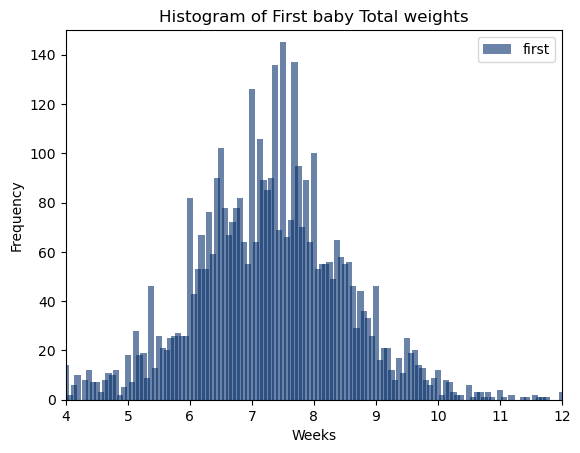

<Figure size 800x600 with 0 Axes>

In [32]:
# Creating Histogram of First babies and the other Babies total Weights
first_babies_wgt_hist=thinkstats2.Hist(first_babies.totalwgt_lb, label='first')
other_babies_wgt_hist=thinkstats2.Hist(other_babies.totalwgt_lb,  label='others')
# Plotting the histogram by setting the alignment and the width
thinkplot.Hist(first_babies_wgt_hist,align='center',width=0.1)
thinkplot.Show(xlabel='Weeks',ylabel='Frequency',axis=[4, 12, 0, 150],
               title='Histogram of First baby Total weights')

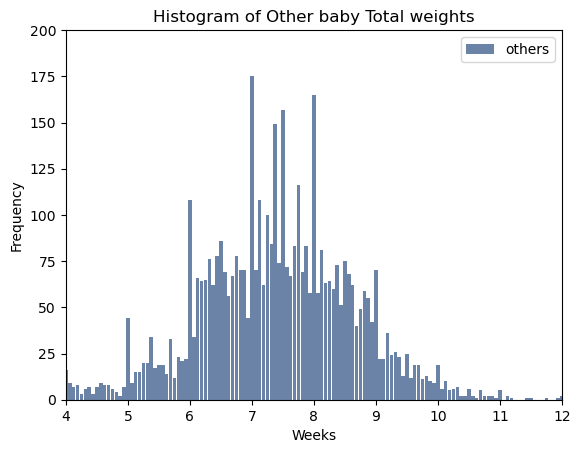

<Figure size 800x600 with 0 Axes>

In [33]:
# Histogram of Other baby weights in pounds
thinkplot.Hist(other_babies_wgt_hist,align='center')
thinkplot.Show(xlabel='Weeks',ylabel='Frequency',axis=[4, 12, 0, 200],
               title='Histogram of Other baby Total weights')

# The Histogram results indicate that most babies weigh between 7-8 pounds when born regardless of being first born or Other

#### ***Solution:*** The mean weights of the first babies and the other babies are almost similar which are 7.2 and 7.35 lbs respectively.  The results of Standard deviation also indicate the same results that there is a difference of about 1-1.5 pounds in weights  for both first born and other babies. The Cohen's d which turns out to be -0.089 which is almost marginal indicates there is no significant difference between the weights of first born and other babies. This measure is ALMOST COMPARABLE to the Cohen's d of pregnancy lengths of  first and other born. The only difference is that the value is negative in this scenario. As the effect size can be either Positive or Negative, the marginal difference in the effect sizes of 2 groups are almost comparable.